# Part 1

In [126]:
import numpy as np
import pandas as pd
import geopandas as gd
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('articleinfo.csv')
df2 = pd.read_csv('authorinfo.csv')

In [128]:
#merge the two .csv files and fill empty cells with 0
new_df = df.merge(df2, left_on = 'Article No.', right_on = 'Article No.', how='outer')
new_df = new_df.fillna(0)
new_df

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0.0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0.0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0.0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,0.0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,160,Virtual reality enhances safety training in th...,2022,2.0,non-WEIRD sample; safety training; simulation;...,3.0,Journal of Computer Assisted Learning,Objective: Many industries struggle with train...,Journal,0,0,0,0.0
467,161,Virtual reality for developing intercultural c...,2022,3.0,Affective domain; Cultural competence; Instruc...,1.0,Educational Technology Research & Development,Intercultural communicative competence (ICC) i...,Journal,0,0,0,0.0
468,162,Virtual reality in problem-based learning cont...,2021,3.0,English learning; motivation; problem-based le...,27.0,Journal of Computer Assisted Learning,Learning a foreign language requires interacti...,Journal,0,0,0,0.0
469,163,Virtual reality is more efficient in learning ...,2020,8.0,Virtual reality; Education; Human heart anatomy,36.0,New Ideas in Psychology,New technologies make their way into education...,Journal,0,0,0,0.0


Part 1, 1. yearly_publication figure


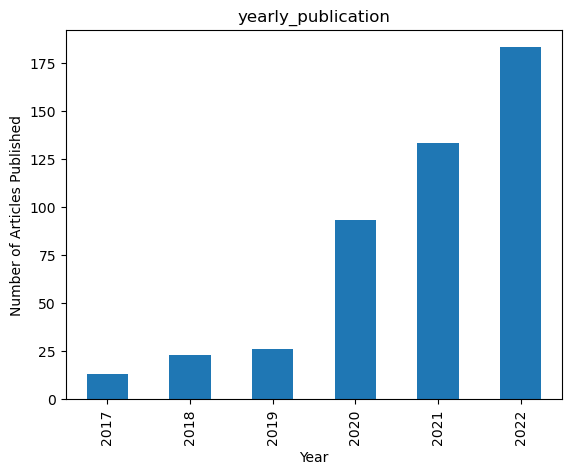

In [129]:
grouped_df = new_df.groupby("Year").size()

grouped_df.plot(kind="bar", x='Year')

plt.title("yearly_publication")
plt.xlabel("Year")
plt.ylabel("Number of Articles Published")
print("Part 1, 1. yearly_publication figure")
plt.show()


Part 1, 2. yearly_citation figure


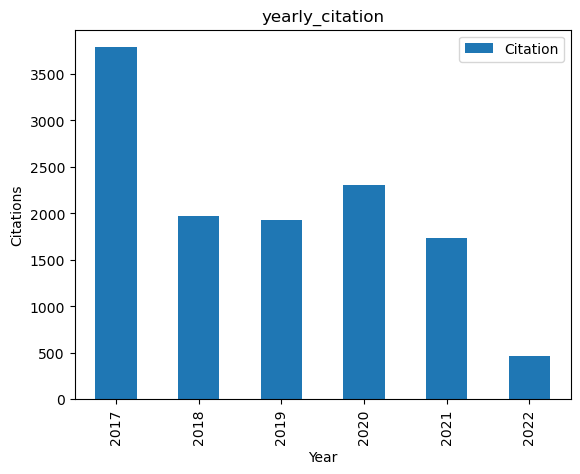

In [130]:
grouped_df = new_df.groupby("Year").sum().reset_index()

grouped_df.plot(kind="bar", x='Year', y='Citation')

plt.title("yearly_citation")
plt.xlabel("Year")
plt.ylabel("Citations")
print("Part 1, 2. yearly_citation figure")
plt.show()

Part 1, 3. Number of Publications across Countries


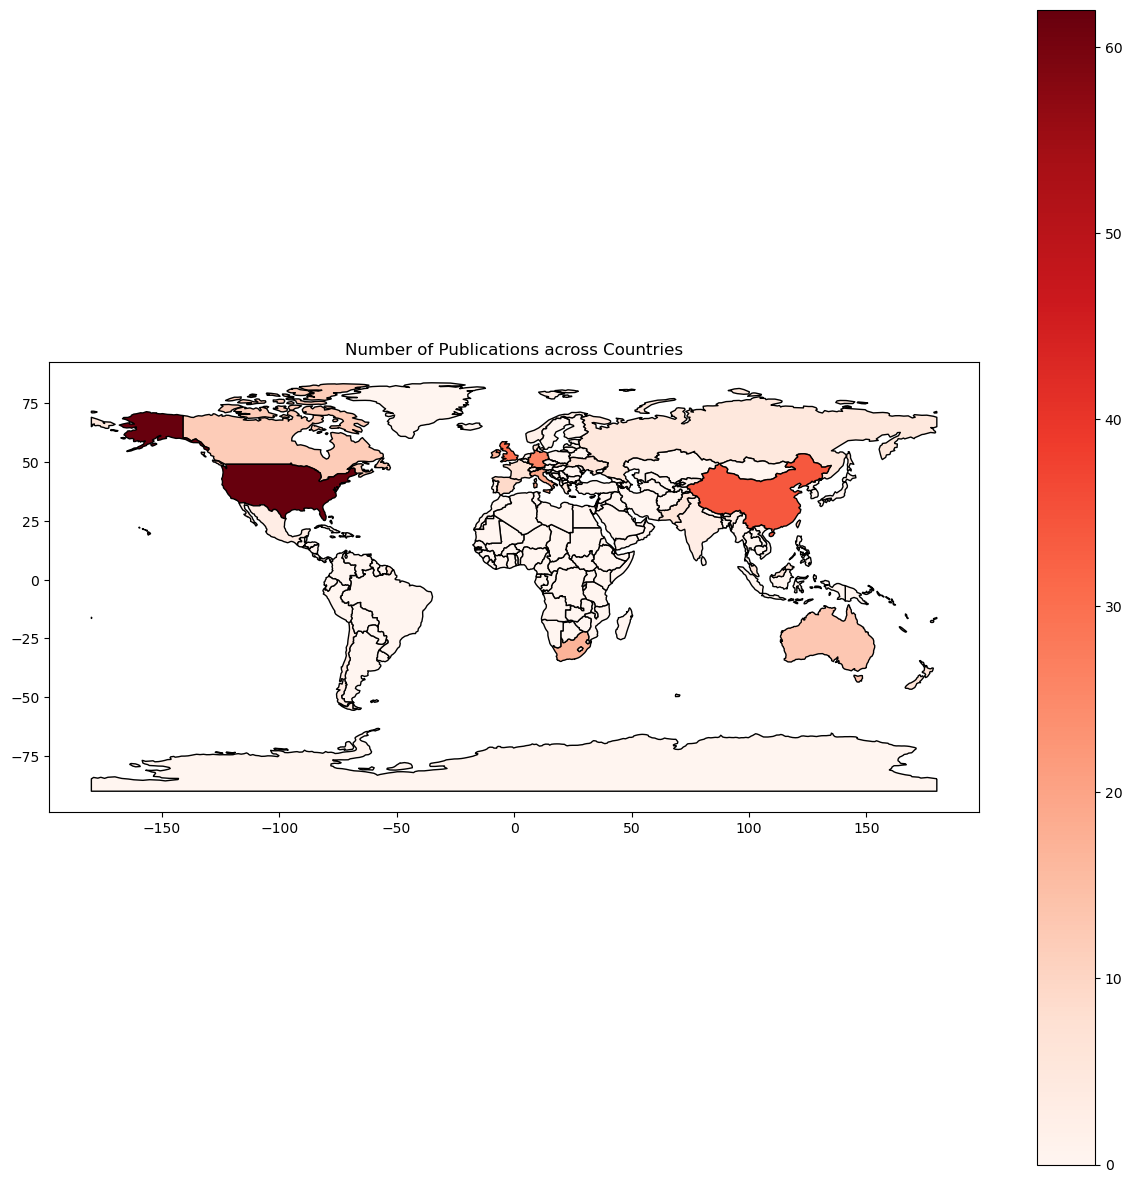

In [131]:
world = gd.read_file(gd.datasets.get_path('naturalearth_lowres'))
countries = new_df.groupby("Country").size().reset_index(name="Count")
merged = world.merge(countries, left_on='name', right_on='Country', how='left')
merged = merged.fillna(0)
merged.plot(column='Count', cmap = 'Reds', figsize = (15,15), legend = True, edgecolor='k')
plt.title("Number of Publications across Countries")
print("Part 1, 3. Number of Publications across Countries")
plt.show()

In [132]:
instCounts = new_df.groupby("Author Affiliation").size().reset_index(name="Count")
top5 = instCounts.sort_values("Count", ascending=False).iloc[1:6]
print("Part 1, 4. Top 5 Institutions with the Most Publications:")
print()
print(top5)

Part 1, 4. Top 5 Institutions with the Most Publications:

                 Author Affiliation  Count
139  University of the Western Cape     17
56               Masaryk University     12
102         University College Cork     11
41                Intel Corporation     11
54      Madigan Army Medical Center      8


In [133]:
hIndex = new_df.groupby("Author Name")["h-index"].mean().reset_index(name="Average h-index")
top5hIndex = hIndex.sort_values("Average h-index", ascending=False).head(5)
print("Part 1, 5. Top 5 Researchers with the Highest h-index:")
print()
print(top5hIndex)

Part 1, 5. Top 5 Researchers with the Highest h-index:

             Author Name  Average h-index
339     Ulrich Trautwein             95.0
249     Nicolas Molinari             63.0
108     George S. Athwal             59.0
209  Maria Luisa Lorusso             33.0
342  Vicente A. González             33.0


# Part 2

In [134]:
#PART 2

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('data.csv')
df.head(10)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error,Unnamed: 6
0,1,84,254,0,3,2,NaN
1,0,58,247,0,6,9,NaN
2,0,56,125,1,6,8,NaN
3,0,55,22,0,11,7,NaN
4,1,95,262,0,2,3,NaN
5,0,71,113,1,8,9,NaN
6,0,76,91,1,6,3,NaN
7,0,64,46,0,6,11,NaN
8,0,56,132,0,9,9,NaN
9,0,96,190,0,11,4,NaN


In [136]:
df.isna().sum()
df = df.fillna(0) # fill any missing values with 0

In [137]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

y = df['SUS'] # dependent variable
x = df.drop(columns='SUS') # predictor variables

In [138]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print("Part 2, 1. Statistical Results of Trained Regresssion Model")
print(model.summary());

Part 2, 1. Statistical Results of Trained Regresssion Model
                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        20:09:39   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

/Users/vishaljanapati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


Part 2, 2. The features that were significant according to the statistical results above were ASR_Error and Intent_Error, as their values for P were below 0.05. Purchase, Duration, and Gender were not significant because the P values were above 0.05. This makes sense, because you would not expect a factor such as gender to affect the usability of Siri.

Part 2, 3. Yes, the results were mostly what I expected. Purchase status should not affect usability, as that is (in most cases) an independent statistic. Duration and gender should also not affect usability. On the other hand, ASR_Error and Intent_Error are definitely factors that affect usability because they can lead to an inhibition of the intended function of Siri.

Part 2, 4. The most influential factors on the SUS score were definitely ASR_Error and Intent_Error. One way we can arrive at this conclucsion from a statistical standpoint is by looking at the p-values and seeing if they are less than 0.05 and therefore significant.

Part 2, 5. The biggest potential reason that these two factors are significant predictors of SUS is because they are directly involved with the user's interaction with Siri. A user speaking in a language unrecognized by Siri would certainly consider Siri to be low on a usability scale. The same goes for a user whose intentions are not understood by Siri. On the other hand, a factor like gender does not have any direct link to usability with Siri, so it would not be a good predictor of SUS.

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [140]:
x = df.drop(columns='SUS')
y = df['SUS']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [141]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

The R square score of linear regression model is:  0.6310867207754959


In [142]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

The R square score of 2-order polynomial regression model is:  0.5220498503426723


# Part 3

In [143]:
#PART 3
y = df['Purchase'] # dependent variable
x = df.drop(columns=['Purchase', 'SUS']) #predictor variables

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

In [146]:
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [147]:
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [148]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              preci

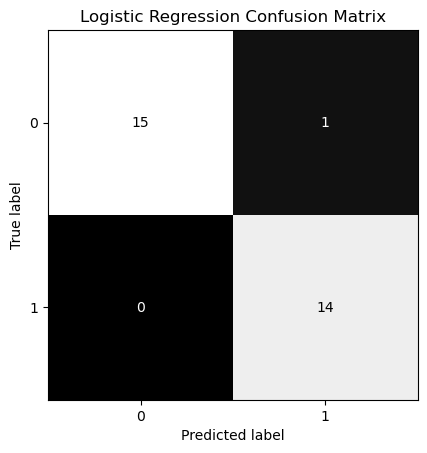

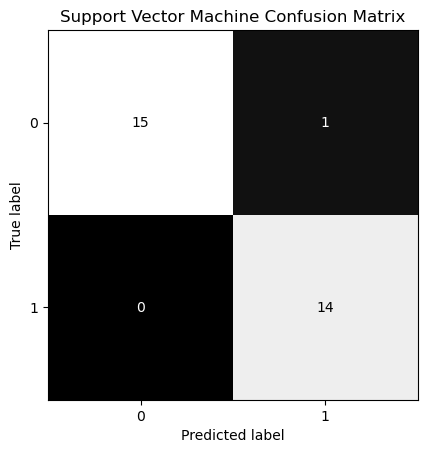

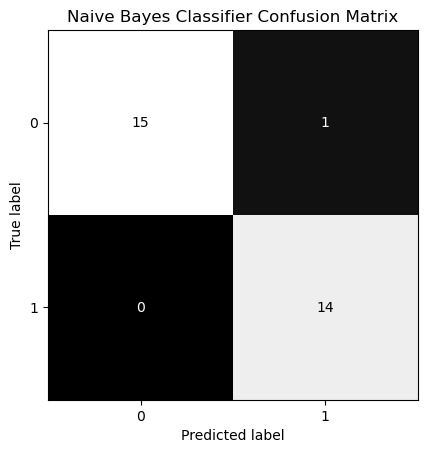

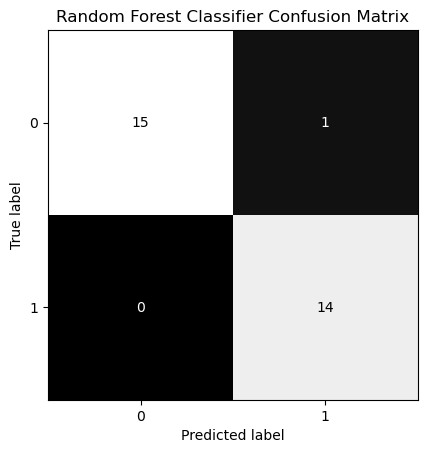

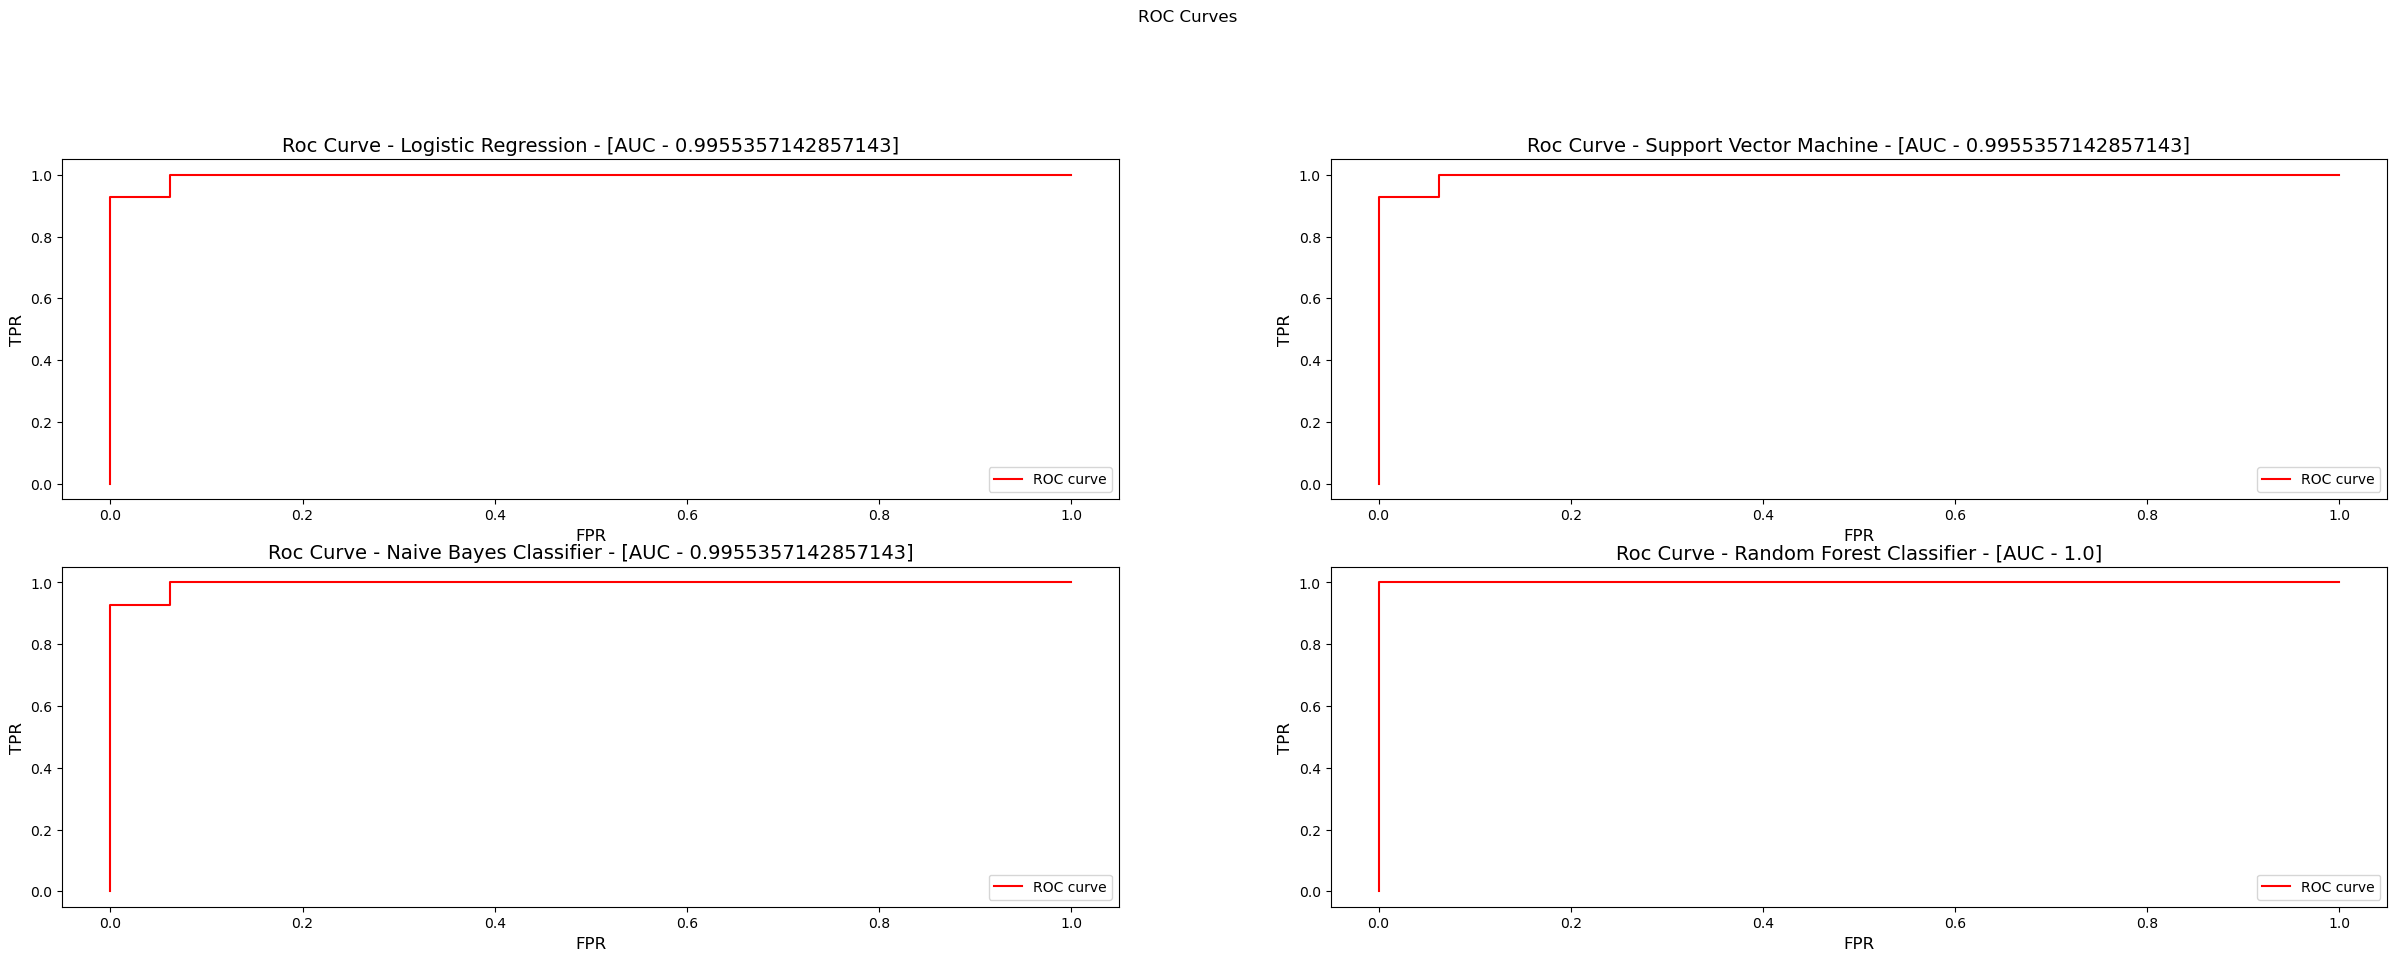

In [151]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()